# ROC Analysis for Multiclass SVMs

El analisis ROC es util para ilustrar el rendimiento de un clasificador generalmente binario (este ejemplo es la extención para el caso multiclase). La curva se hace graficando la tasa de verdaderos positivos ( i.e. TRP, recall, sensitividad) contra la tasa de falsos positivos (i.e. FRP, especificidad, fallout) según los diferentes ajustes de umbral.

## True Positive Rate and False Positive Rate

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split, cross_val_score


tfidf_vect= TfidfVectorizer(use_idf=True, smooth_idf=True, sublinear_tf=False, ngram_range=(2,2))
import pandas as pd

df = pd.read_csv('/Users/user/Tesis/escritorio_anterior/MICAI/todos.csv',
                 header=0, sep=',', names=['id', 'content', 'label']).fillna(0)
df

,id,content,label
0,AEG_Electrolux_60840_Lavamat__Opinion_1506705,programa especial ropa sensible planchado f\xe...,5
1,AEG_Electrolux_62610_Lavamat__Opinion_2000923,carga superior punto medio color blanco carga ...,4
2,AEG_Electrolux_L14800VI__Opinion_2005396,carga superior forma frontal programa majo efi...,5
3,AEG_Electrolux_L6227FL__Opinion_2140710,modelo electroluxmuy fácil altamente satisfact...,4
4,AEG_Electrolux_L62280FL__Opinion_2151025,clasificación energético sonido bajo conversac...,4
5,AEG_Electrolux_L62642VI__Opinion_1995158,ficha tecnica programa especial prenda delicad...,5
6,AEG_Electrolux_L62642VI__Opinion_1995791,habitación principal control electrónico clasi...,4
7,AEG_Electrolux_L70470FL__Opinion_2085167,clasificación energético fase anterior lavado ...,4
8,AEG_Electrolux_L74650__Opinion_1856967,capazidad grande entender mucho muy simple muy...,3
9,AEG_Electrolux_L85275XFL__Opinion_2138100,temperatura medio ciclo medio factor determina...,5


In [2]:
X = tfidf_vect.fit_transform(df['content'].values)
y = df['label'].values

In [3]:
# Binarize the output
from sklearn.preprocessing import label_binarize

y = label_binarize(y, classes=[1,2,3,4,5])
n_classes = y.shape[1]
random_state = 0

In [4]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=0)

# Learn to predict each class against the other
#from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier


classifier = OneVsRestClassifier(SVC(kernel = 'linear'))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

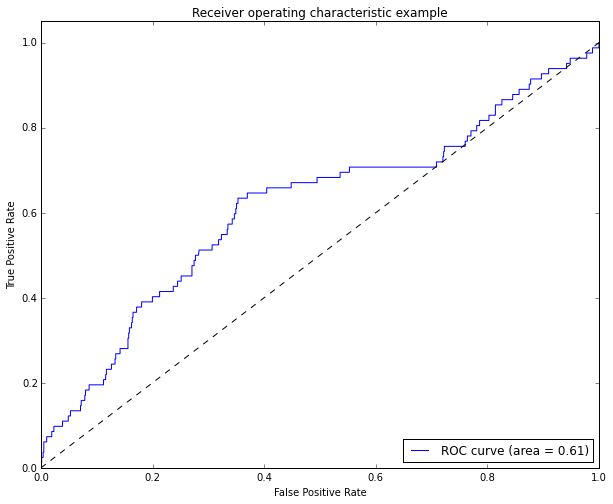

In [17]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

%matplotlib inline
import matplotlib.pyplot as plt

# Plot of a ROC curve for a specific class
plt.figure(figsize=(10, 8))
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


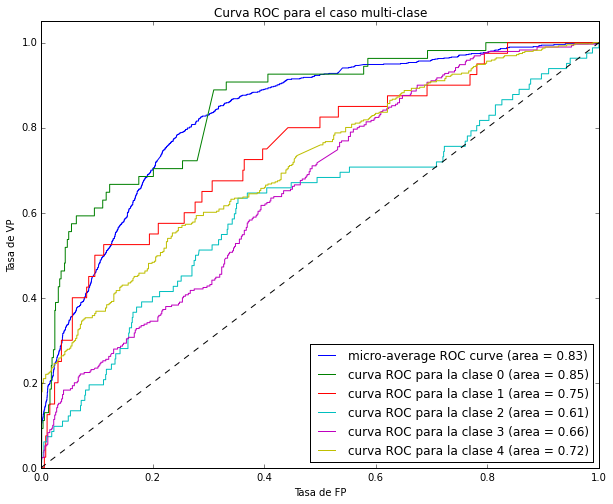

In [16]:
# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='curva ROC para la clase {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de FP')
plt.ylabel('Tasa de VP')
plt.title('Curva ROC para el caso multi-clase')
plt.legend(loc="lower right")
plt.show()